In [1]:
import numpy as np
import cv2
from PIL import Image
import pytesseract as pytess

Number  input image...


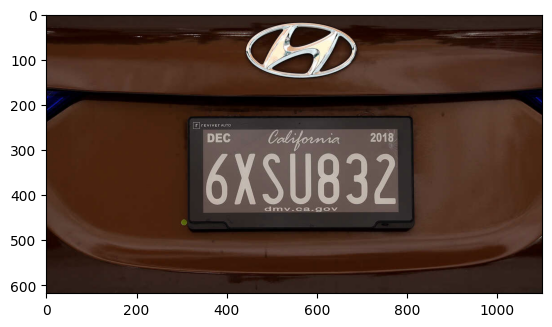

In [2]:
img = cv2.imread("license1.jpeg")
print("Number  input image...",)
plt.imshow(img)

In [3]:
img2 = cv2.GaussianBlur(img, (3,3), 0)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.Sobel(img2,cv2.CV_8U,1,0,ksize=3)   
_,img2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
morph_img_threshold = img2.copy()
cv2.morphologyEx(src=img2, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
num_contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img2, num_contours, -1, (0,255,0), 1)
for i,cnt in enumerate(num_contours):
   min_rect = cv2.minAreaRect(cnt)
if ratio_and_rotation(min_rect):
       x,y,w,h = cv2.boundingRect(cnt)
       plate_img = img[y:y+h,x:x+w]
       print("Number  identified number plate...")
       plt.imshow(plate_img)

NameError: name 'ratio_and_rotation' is not defined

In [ ]:
if(isMaxWhite(plate_img)):
           clean_plate, rect = clean2_plate(plate_img)
if rect:
               fg=0
               x1,y1,w1,h1 = rect
               x,y,w,h = x+x1,y+y1,w1,h1
              # cv2.imwrite("clena.png",clean_plate)
               plate_im = Image.fromarray(clean_plate)
               text = tess.image_to_string(plate_im, lang='eng')
               print("Number  Detected Plate Text : ",text)